# Day 9, 2d & 3d movies!

In [1]:
# import our usual things
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np

In [2]:
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv', 
                     sep=",", comment="#")

In [3]:
planets

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,0.320000,-0.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,3.200000,-3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.230000,-0.230000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.500000,-2.500000,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.000000,-1.000000,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,4160,tau Gem,b,tau Gem b,Radial Velocity,0,1,305.500000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4160,4161,ups And,b,ups And b,Radial Velocity,0,3,4.617033,0.000023,-0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4161,4162,ups And,c,ups And c,Radial Velocity,0,3,241.258000,0.064000,-0.064000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4162,4163,ups And,d,ups And d,Radial Velocity,0,3,1276.460000,0.570000,-0.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


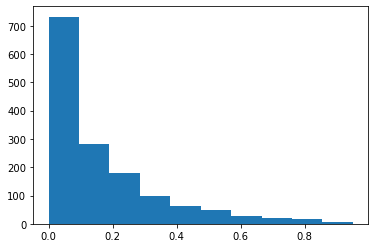

In [4]:
plt.hist(planets['pl_orbeccen'])
plt.show()

In [5]:
from hermite_library import read_hermite_solution_from_file

In [6]:
planet_file = 'data/Kepler-11-savedSim.txt'
#planet_file = 'Kepler-11-savedSim.txt' # if all .txt files are in the same directory as my notebook file

t_h, E_h, r_h, v_h = read_hermite_solution_from_file(planet_file)
#time, energy, postion, velocity

In [7]:
r_h.shape

(7, 3, 8800)

The shape of r_h (position) array is: `r_h[# of planets+host star, x/y/z - 3D position, time steps]`

In [8]:
r_h[0,:,:].shape # all positions, all times of the first planet

(3, 8800)

In [9]:
# x position, all times for the 2nd body in this system
r_h[1,0,:].shape

(8800,)

First thing we are going to do is plot the orbits statically (not a movie).

2D plot of x/y positions over ALL timesteps for ALL of the planets.

In [10]:
r_h.shape[0]

7

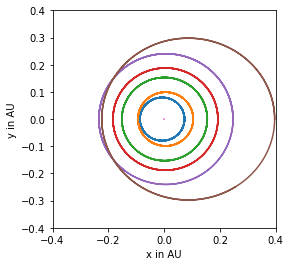

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# want to loop over all bodies in this simulation and plot their TOTAL orbits -- all times
# x/y positions only
# r_h[# bodies, x/y/z 3D positions, all time steps]
for i in range(r_h.shape[0]): # looping over all bodies
    # now we want to plot (for given body) the x/y positions
    # over ALL times
    # r_h[ith planet, x position, all times], r_h[ith planet, y position, all times]
    ax.plot(r_h[i,0,:], r_h[i,1,:])
    
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
plt.show()

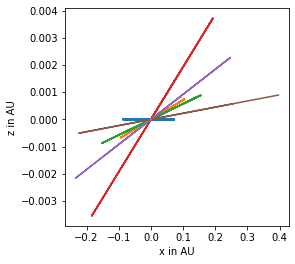

In [12]:
# X VS. Z plot

fig, ax = plt.subplots(1,1,figsize=(4,4))

# want to loop over all bodies in this simulation and plot their TOTAL orbits -- all times
# x/y positions only
# r_h[# bodies, x/y/z 3D positions, all time steps]
for i in range(r_h.shape[0]): # looping over all bodies
    # now we want to plot (for given body) the x/z positions
    # over ALL times
    # r_h[ith planet, x position, all times], r_h[ith planet, z position, all times]
    ax.plot(r_h[i,0,:], r_h[i,2,:])
    
ax.set_xlabel('x in AU')
ax.set_ylabel('z in AU')
plt.show()

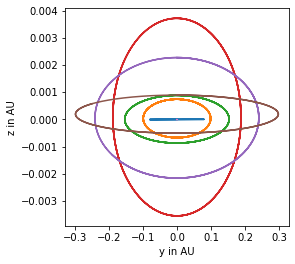

In [13]:
# Y vs. Z.
fig, ax = plt.subplots(1,1,figsize=(4,4))

# want to loop over all bodies in this simulation and plot their TOTAL orbits -- all times
# x/y positions only
# r_h[# bodies, x/y/z 3D positions, all time steps]
for i in range(r_h.shape[0]): # looping over all bodies
    # now we want to plot (for given body) the x/z positions
    # over ALL times
    # r_h[ith planet, y position, all times], r_h[ith planet, z position, all times]
    ax.plot(r_h[i,1,:], r_h[i,2,:])
    
ax.set_xlabel('y in AU')
ax.set_ylabel('z in AU')
plt.show()

## Attempting! to make and save a 2D movie

In [14]:
from animations_library import plot_animations

Note: to use this animation library we have to use the `matplotlib.animation` sub-library.

In [15]:
from matplotlib import animation

In [16]:
animation

<module 'matplotlib.animation' from '/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/matplotlib/animation.py'>

In [17]:
# create a figure objection (but don't plot anything on it)
#fig, ax = plt.subplots(1,1, figsize=(5,5))

Before creating our animation on this figure object, we might want to make it a little more efficient by downsampling in time.

In [18]:
stepSize = 50 # I'm going to create a image every 50th timestep out of the 8800

In [19]:
# downsampled position vector
r = r_h[:,:,0:-1:stepSize] # technically this goes up until the 2nd to last timestep 
# can also do: r_h[:,:, 0::stepSize]

In [20]:
r_h.shape, r.shape

((7, 3, 8800), (7, 3, 176))

In [21]:
t_h.shape

(8800,)

In [22]:
t_h

array([0.00000000e+00, 1.13649278e+03, 2.27298557e+03, ...,
       9.99772701e+06, 9.99886351e+06, 1.00000000e+07])

In [23]:
# downsample in time the time variable
t = t_h[0:-1:stepSize]

In [24]:
t_h.shape, t.shape

((8800,), (176,))

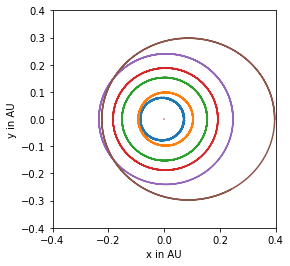

In [25]:
# use the downsampled versions!!
fig, ax = plt.subplots(1,1,figsize=(4,4))

# want to loop over all bodies in this simulation and plot their TOTAL orbits -- all times
# x/y positions only
# r_h[# bodies, x/y/z 3D positions, all time steps]
for i in range(r.shape[0]): # looping over all bodies
    # now we want to plot (for given body) the x/y positions
    # over ALL times
    # r_h[ith planet, x position, all times], r_h[ith planet, y position, all times]
    ax.plot(r[i,0,:], r[i,1,:])
    
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
plt.show()

After that bit of downsampling tangent, let's actually make that animation!

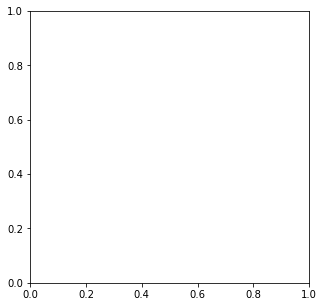

In [26]:
# create a figure objection (but don't plot anything on it)
fig, ax = plt.subplots(1,1, figsize=(5,5))

In [27]:
# 2nd step is to use plot_animations to setup the animation stuff we need
init, animate, nFrames = plot_animations(fig, ax, t, r) # t is need here because Jill wrote the library funny!

In [28]:
# 3rd step is to use matplotlib to put animation files together
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                              frames=nFrames, interval=20, blit=True)

In [29]:
anim.save?

In [30]:
anim.save('anim_trial.mp4')

In [31]:
# if the above didn't work, you can try this:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [32]:
anim.save('anim_trial2.mp4', writer=writer)

In [33]:
from IPython.display import Video

In [34]:
Video("anim_trial.mp4", width=400)

## Stuff in 3D!

In [5]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)

/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + gradient[2] ** 2)


In [3]:
#!conda install -c conda-forge ipyvolume --yes
import ipyvolume
import numpy as np

In [4]:
x, y, z = np.random.random((3,10))
ipyvolume.quickscatter(x,y,z, size=1, marker="sphere")

In [38]:
x.shape

(10,)

In [39]:
r_h[:,0,:].shape # [all the planets, x-values, all times]

(7, 8800)

In [40]:
r_h[:,0,:].ravel() # take our x array for all of the planets and making it into a 1D array (ipyvolume)

array([-8.69460729e-02, -8.69427997e-02, -8.69329803e-02, ...,
       -2.30013480e-05, -2.30219366e-05, -2.30424531e-05])

In [41]:
r_h[:,0,:].ravel().shape

(61600,)

In [42]:
# if we wanna downsample
stepSize = 50
r = r_h[:,:,0:-1:stepSize] # technically this goes up until the 2nd to last timestep 

# do this for all of the positions x/y/z
x = r[:,0,:].ravel()
y = r[:,1,:].ravel()
z = r[:,2,:].ravel()

In [43]:
ipyvolume.quickscatter(x,y,z, size=1, marker="sphere")